In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score

Import training set

In [554]:
ames = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/project_2/starter_data/train.csv')

Import test set

In [555]:
test = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/project_2/starter_data/test.csv')

In [556]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [557]:
ames.shape

(2051, 81)

In [558]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [559]:
test.shape

(878, 80)

##### Change column names to lower and _

Training

In [560]:
ames.columns = ames.columns.str.lower().str.replace(' ', '_')

In [561]:
ames.columns;

In [562]:
len(ames.columns)

81

Test

In [563]:
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [564]:
test.columns;

In [565]:
len(test.columns)

80

In [566]:
def mass_value(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        value_list.append(item.upper())
        value_list.append(df[item].value_counts())
    return value_list
    

In [567]:
def fill_na_mean(df):
    #Cleans float and integer NaNs by replacing with mean
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            df[item].fillna(df[item].mean(), inplace = True)

In [568]:
def fill_na_string(df):
    #Cleans string object NaNs by replacing with a string
    for item in df.columns:
        if df[item].dtypes == str or df[item].dtypes == object:
            df[item].fillna('no value', inplace = True)

In [569]:
def null_counter(series):
    count = 0

    for item in series.isnull():
        if item == True:
            count += 1
    return f'{count} null values' 

### Engineer a Total Sf Feature

In [570]:
ames['total_sf'] = ames['total_bsmt_sf'] + ames['1st_flr_sf'] + ames['2nd_flr_sf']

In [571]:
test['total_sf'] = test['total_bsmt_sf'] + test['1st_flr_sf'] + test['2nd_flr_sf']

### Engineer a Total Bath Feature

In [572]:
ames['total_bath'] = ames['full_bath'] + (.5 * ames['half_bath'])

In [573]:
test['total_bath'] = test['full_bath'] + (.5 * test['half_bath'])

### Create Simple DF

In [574]:
simple = ['bedroom_abvgr', 'year_remod/add'
          , 'overall_cond', 'house_style', 
          'garage_cars', 'lot_area', 
          'neighborhood', 'bldg_type', 'total_sf', 'total_bath', 'saleprice']

In [575]:
simple_test = ['bedroom_abvgr', 'year_remod/add'
          , 'overall_cond', 'house_style', 
          'garage_cars', 'lot_area', 
          'neighborhood', 'bldg_type', 'total_sf', 'total_bath']

In [576]:
simple_df = ames[simple]

In [577]:
simple_test = test[simple_test]

In [578]:
simple_df.head()

,bedroom_abvgr,year_remod/add,overall_cond,house_style,garage_cars,lot_area,neighborhood,bldg_type,total_sf,total_bath,saleprice
0,3,2005,8,2Story,2.0,13517,Sawyer,1Fam,2204.0,2.5,130500
1,4,1997,5,2Story,2.0,11492,SawyerW,1Fam,3035.0,2.5,220000
2,3,2007,7,1Story,1.0,7922,NAmes,1Fam,2114.0,1.0,109000
3,3,2007,5,2Story,2.0,9802,Timber,1Fam,1828.0,2.5,174000
4,3,1993,8,1.5Fin,2.0,14235,SawyerW,1Fam,2121.0,2.0,138500


In [579]:
simple_df.dtypes

bedroom_abvgr       int64
year_remod/add      int64
overall_cond        int64
house_style        object
garage_cars       float64
lot_area            int64
neighborhood       object
bldg_type          object
total_sf          float64
total_bath        float64
saleprice           int64
dtype: object

In [580]:
simple_test.head()

,bedroom_abvgr,year_remod/add,overall_cond,house_style,garage_cars,lot_area,neighborhood,bldg_type,total_sf,total_bath
0,4,1950,8,2Story,1,9142,OldTown,2fmCon,2948,2.0
1,6,1977,4,1Story,2,9662,Sawyer,Duplex,3934,2.0
2,3,2006,5,2Story,2,17104,Gilbert,1Fam,2150,2.5
3,2,2006,6,1Story,2,8520,OldTown,1Fam,1936,1.0
4,3,1963,5,1Story,2,9500,NAmes,1Fam,2788,1.5


In [581]:
simple_test.dtypes

bedroom_abvgr       int64
year_remod/add      int64
overall_cond        int64
house_style        object
garage_cars         int64
lot_area            int64
neighborhood       object
bldg_type          object
total_sf            int64
total_bath        float64
dtype: object

In [582]:
simple_df.shape

(2051, 11)

In [583]:
simple_test.shape

(878, 10)

# Save DF's to CSV

In [584]:
simple_df.to_csv('../datasets/simple.csv')

In [585]:
simple_test.to_csv('../datasets/simple_test.csv')

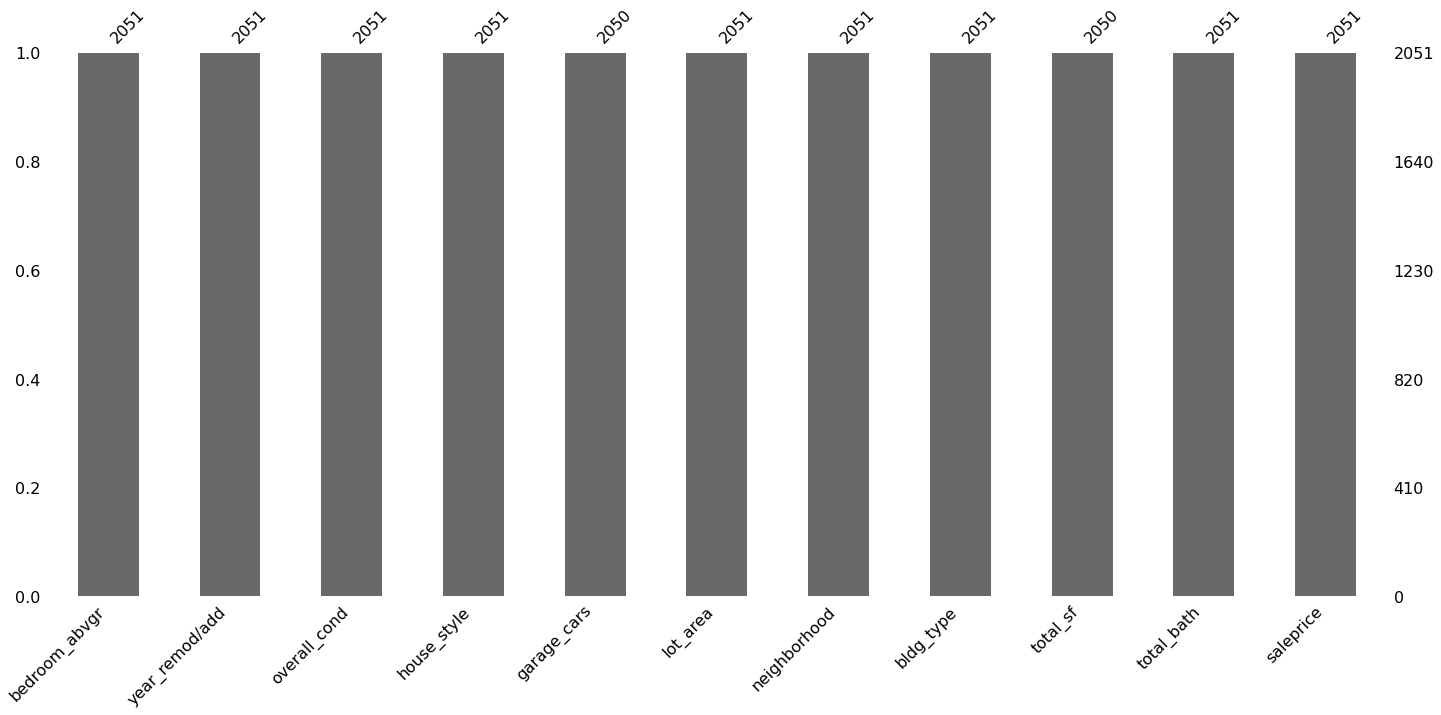

In [586]:
msno.bar(simple_df);

* [ ] Dummy house_style
* [ ] Dummy neighborhood
* [ ] Dummy bldg_type
* [X] fill Na value in garage-cars and total_sf

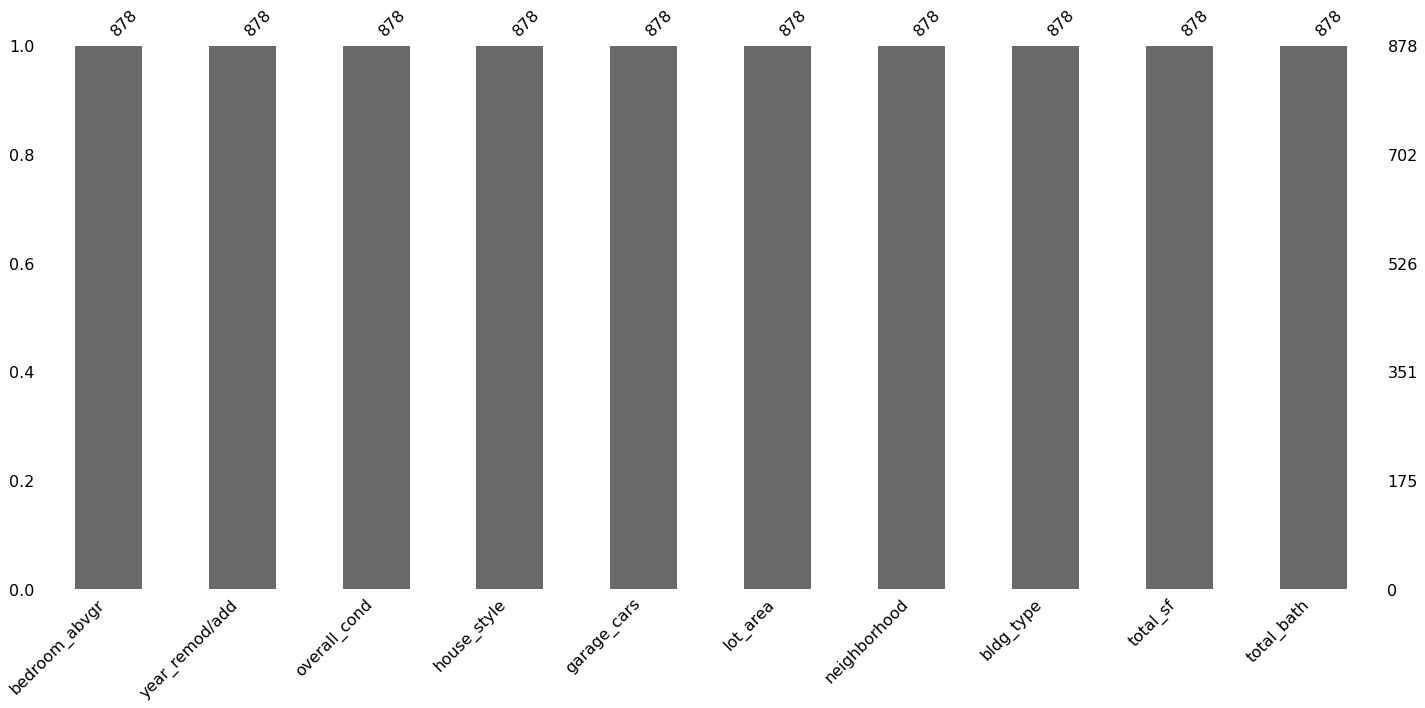

In [587]:
msno.bar(simple_test);

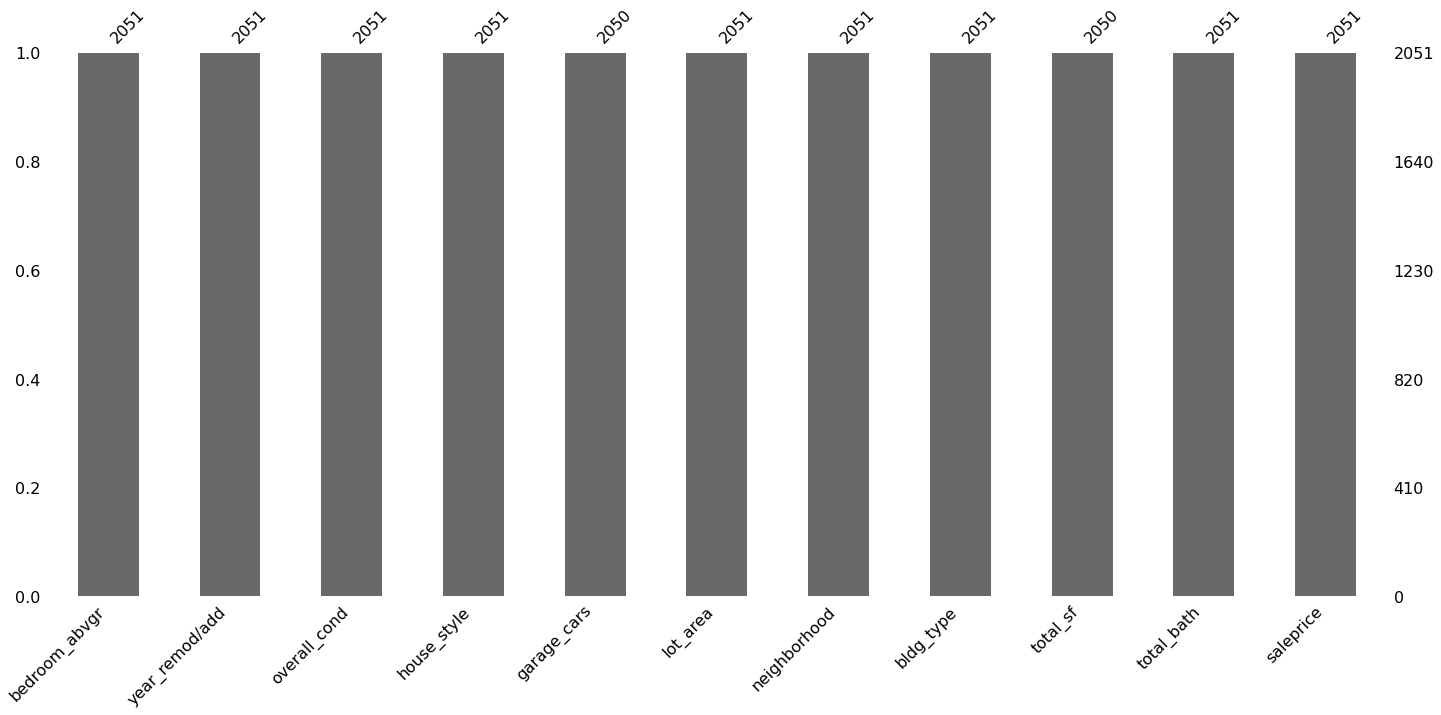

In [588]:
msno.bar(simple_df);

# DUMMIES

Training

In [589]:
simple_df = pd.get_dummies(simple_df, columns = ['house_style', 'neighborhood', 'bldg_type'], drop_first = True)

In [590]:
simple_df.head()

,bedroom_abvgr,year_remod/add,overall_cond,garage_cars,lot_area,total_sf,total_bath,saleprice,house_style_1.5Unf,house_style_1Story,...,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,3,2005,8,2.0,13517,2204.0,2.5,130500,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,1997,5,2.0,11492,3035.0,2.5,220000,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2007,7,1.0,7922,2114.0,1.0,109000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2007,5,2.0,9802,1828.0,2.5,174000,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,1993,8,2.0,14235,2121.0,2.0,138500,0,0,...,0,1,0,0,0,0,0,0,0,0


In [591]:
simple_df.shape

(2051, 46)

Test

In [592]:
simple_test = pd.get_dummies(simple_test, columns = ['house_style', 'neighborhood', 'bldg_type'], drop_first = True)

In [593]:
simple_test.head()

,bedroom_abvgr,year_remod/add,overall_cond,garage_cars,lot_area,total_sf,total_bath,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,...,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,4,1950,8,1,9142,2948,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6,1977,4,2,9662,3934,2.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,2006,5,2,17104,2150,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2006,6,2,8520,1936,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1963,5,2,9500,2788,1.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Reshaping test and train df's to match

In [594]:
simple_test.shape

(878, 43)

In [595]:
for item in simple_df.columns:
    if item not in simple_test.columns and item != 'saleprice':
        simple_df.drop(columns = [item], inplace = True)

In [596]:
simple_df.shape

(2051, 44)

### Save a copy of Simple Df with Dummies

In [597]:
simple_df.to_csv('../datasets/simple_dummy.csv')

In [598]:
simple_test.to_csv('../datasets/simple_test_dummy.csv')

# Create X and Y

In [599]:
features = simple_df.drop('saleprice', axis = 1)

In [600]:
features.shape

(2051, 43)

In [602]:
simple_test.shape

(878, 43)

In [610]:
list(simple_df.columns)

['bedroom_abvgr',
 'year_remod/add',
 'overall_cond',
 'garage_cars',
 'lot_area',
 'total_sf',
 'total_bath',
 'saleprice',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE']

In [615]:
list(simple_test.columns)

['bedroom_abvgr',
 'year_remod/add',
 'overall_cond',
 'garage_cars',
 'lot_area',
 'total_sf',
 'total_bath',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE']

In [621]:
X = features
y = simple_df['saleprice']

X_test = simple_test

# Train/Test Split

In [623]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split( X_overfit, 
         y, 
         random_state = 42 )

Scale Data

In [625]:
#Relabeling scaled data as "Z" is common. 

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

Instantiate Linear Regression, Lasso and Ridge Models

In [626]:
# Instantiate Linear Regresion
lr = LinearRegression()

In [627]:
#Instantitate Ridge Model
ridge = RidgeCV()

Cross Validation

In [628]:
lr_scores = cross_val_score(lr, Z_train, y_train, cv=3)
lr_scores.mean()

-3.2977046770183947e+25

In [629]:
ridge.scores = cross_val_score(ridge, Z_train, y_train, cv=3)
ridge.scores.mean()

0.7955319175160085

In [633]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [634]:
test_predict = ridge.predict(Z_test)

In [635]:
test_predict

array([-8.10864942e+08, -8.10781806e+08, -8.10873081e+08, -8.10946333e+08,
       -8.10834287e+08, -8.09883884e+08, -8.10897790e+08, -8.10630805e+08,
       -8.10719881e+08, -8.10565318e+08, -8.10527025e+08, -8.11099280e+08,
       -8.11965084e+08, -8.10637359e+08, -8.10715859e+08, -8.10990829e+08,
       -8.10869226e+08, -8.10813289e+08, -8.10829768e+08, -8.11024945e+08,
       -8.10805237e+08, -8.11196331e+08, -8.10858766e+08, -8.10664881e+08,
       -8.10634418e+08, -8.09984352e+08, -8.10779794e+08, -8.10658214e+08,
       -8.10554613e+08, -8.10779494e+08, -8.10868189e+08, -8.10706765e+08,
       -8.10685634e+08, -8.10845586e+08, -8.10830996e+08, -8.10515237e+08,
       -8.11449993e+08, -8.10824515e+08, -8.10021619e+08, -8.10675296e+08,
       -8.11107920e+08, -8.10744433e+08, -8.10539031e+08, -8.10804869e+08,
       -8.10770074e+08, -8.10697427e+08, -8.10753947e+08, -8.11015607e+08,
       -8.10870331e+08, -8.10702515e+08, -8.11219540e+08, -8.10793531e+08,
       -8.10802085e+08, -